In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [15]:
train=pd.read_csv('train/train.csv')

In [16]:
print(train.head())
print(train.shape)

   ImageId NameOfPokemon
0  296.jpg       Pikachu
1  297.jpg       Pikachu
2  298.jpg       Pikachu
3  299.jpg       Pikachu
4  300.jpg       Pikachu
(304, 2)


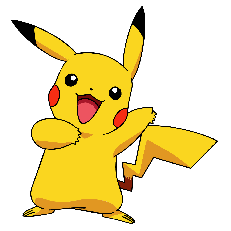

In [17]:
# image display
image=cv2.imread('train/Images/297.jpg')
plt.imshow(image[:,:,[2,1,0]])
plt.axis('off')
plt.show()

In [18]:
train=train.values

In [19]:
np.random.shuffle(train)
print(train)

[['391.jpg' 'Pikachu']
 ['524.jpg' 'Charmander']
 ['348.jpg' 'Pikachu']
 ['443.jpg' 'Bulbasaur']
 ['533.jpg' 'Charmander']
 ['531.jpg' 'Charmander']
 ['431.jpg' 'Bulbasaur']
 ['598.jpg' 'Charmander']
 ['545.jpg' 'Charmander']
 ['472.jpg' 'Bulbasaur']
 ['568.jpg' 'Charmander']
 ['346.jpg' 'Pikachu']
 ['396.jpg' 'Pikachu']
 ['416.jpg' 'Bulbasaur']
 ['576.jpg' 'Charmander']
 ['339.jpg' 'Pikachu']
 ['307.jpg' 'Pikachu']
 ['343.jpg' 'Pikachu']
 ['561.jpg' 'Charmander']
 ['586.jpg' 'Charmander']
 ['381.jpg' 'Pikachu']
 ['402.jpg' 'Bulbasaur']
 ['312.jpg' 'Pikachu']
 ['469.jpg' 'Bulbasaur']
 ['420.jpg' 'Bulbasaur']
 ['407.jpg' 'Bulbasaur']
 ['553.jpg' 'Charmander']
 ['453.jpg' 'Bulbasaur']
 ['368.jpg' 'Pikachu']
 ['321.jpg' 'Pikachu']
 ['399.jpg' 'Bulbasaur']
 ['552.jpg' 'Charmander']
 ['429.jpg' 'Bulbasaur']
 ['495.jpg' 'Bulbasaur']
 ['617.jpg' 'Charmander']
 ['457.jpg' 'Bulbasaur']
 ['546.jpg' 'Charmander']
 ['496.jpg' 'Bulbasaur']
 ['529.jpg' 'Charmander']
 ['328.jpg' 'Pikachu']
 ['591.jpg

# creating dataset

In [20]:
dic={}
for fx in os.listdir('train/Images'):
    img=cv2.imread('train/Images/'+fx)      #reading the images
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)  #converting to RBG
    resized=cv2.resize(img,(100,100))   #resizing the images
    flatten=resized.reshape((1,30000))
    dic[fx]=flatten
    

In [21]:
dic

{'296.jpg': array([[145, 190, 232, ...,  79, 139, 211]], dtype=uint8),
 '297.jpg': array([[255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 '298.jpg': array([[255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 '299.jpg': array([[255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 '300.jpg': array([[255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 '301.jpg': array([[255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 '302.jpg': array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '303.jpg': array([[255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 '304.jpg': array([[255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 '305.jpg': array([[255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 '306.jpg': array([[255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 '307.jpg': array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '308.jpg': array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '309.jpg': array([[255, 253, 251, ..., 255, 253, 251]], dtype=uint8),
 '310.jpg': array([[255, 255, 255, ..., 25

In [24]:
# creating trainig data
X_train=np.zeros((len(dic),30000))
Y_train=[]
for i,f in enumerate(train[:,0]):
    for k in dic.keys():
        if k==f:
            X_train[i]=dic[k] 
            Y_train.append(train[i][1])

In [25]:
X_train

array([[255., 243., 184., ..., 226., 208., 111.],
       [255., 255., 255., ..., 255., 255., 255.],
       [103., 244.,  68., ..., 123., 255.,  74.],
       ...,
       [238., 236., 158., ..., 154., 126., 206.],
       [255., 255., 255., ..., 255., 255., 255.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [26]:
Y_train

['Pikachu',
 'Charmander',
 'Pikachu',
 'Bulbasaur',
 'Charmander',
 'Charmander',
 'Bulbasaur',
 'Charmander',
 'Charmander',
 'Bulbasaur',
 'Charmander',
 'Pikachu',
 'Pikachu',
 'Bulbasaur',
 'Charmander',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Charmander',
 'Charmander',
 'Pikachu',
 'Bulbasaur',
 'Pikachu',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Charmander',
 'Bulbasaur',
 'Pikachu',
 'Pikachu',
 'Bulbasaur',
 'Charmander',
 'Bulbasaur',
 'Bulbasaur',
 'Charmander',
 'Bulbasaur',
 'Charmander',
 'Bulbasaur',
 'Charmander',
 'Pikachu',
 'Charmander',
 'Bulbasaur',
 'Bulbasaur',
 'Pikachu',
 'Bulbasaur',
 'Bulbasaur',
 'Pikachu',
 'Pikachu',
 'Charmander',
 'Bulbasaur',
 'Pikachu',
 'Pikachu',
 'Charmander',
 'Bulbasaur',
 'Pikachu',
 'Bulbasaur',
 'Bulbasaur',
 'Pikachu',
 'Bulbasaur',
 'Pikachu',
 'Bulbasaur',
 'Charmander',
 'Pikachu',
 'Charmander',
 'Pikachu',
 'Bulbasaur',
 'Charmander',
 'Pikachu',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Bulbasaur',


In [27]:
Y=[]
for i in Y_train:
    if i=='Pikachu':
        Y.append(0)
    elif i=='Bulbasaur':
        Y.append(1)
    else:
        Y.append(2)
print(Y)

[0, 2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 2, 1, 1, 2, 1, 2, 1, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 0, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0, 1, 0, 1, 2, 0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 2, 1, 1, 2, 1, 0, 0, 2, 0, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 0, 0, 1]


# creating test dataset

In [28]:
sample=pd.read_csv('test/Sample_submission.csv')

In [29]:
sample.head()

,ImageId,NameOfPokemon
0,1106.jpg,Pikachu
1,2236.jpg,Pikachu
2,1131.jpg,Pikachu
3,2221.jpg,Pikachu
4,2011.jpg,Pikachu


In [30]:
sample.shape

(123, 2)

In [31]:
sample=sample.values

In [32]:
test_dic={}
for fx in os.listdir('test/Images'):
    img=cv2.imread('test/Images/'+fx)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)  #converting to RBG
    resized=cv2.resize(img,(100,100))   #resizing the images
    flatten=resized.reshape((1,30000))
    test_dic[fx]=flatten
        

In [33]:
X_test=np.zeros((len(test_dic),30000))

In [34]:
for i,im in enumerate(sample[:,0]): 
    for k in test_dic.keys():
        if k==im:
            X_test[i]=test_dic[k]            

In [35]:
X_test

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [217., 217., 217., ..., 217., 217., 217.],
       [ 48., 128., 104., ..., 172., 208.,  88.],
       [255., 255., 255., ..., 255., 255., 255.]])

# KNN CLASSIFICATION

In [48]:
def euc_dis(p1,p2):
    return (np.sum((p2-p1)**2))**0.5

def knn(X_train,Y_train,test,k=3):
    predictions=[]
    for i in range(test.shape[0]):
        d=[]
        for j in range(X_train.shape[0]):
            dis=euc_dis(X_train[j],test[i])
            d.append([dis,Y_train[j]])
        d=np.array(sorted(d,key=lambda d:d[0]))
        d=d[:k]
        #print(d)
        u=np.unique(d,return_counts=True)
        pred=u[0][np.argmax(u[1])]
        if pred==0:
            predictions.append('Pikachu')
        elif pred==1:
            predictions.append('Bulbasaur')
        else:
            predictions.append('Charmander')
    return predictions

# naive bayes

In [36]:
from sklearn.naive_bayes import GaussianNB


In [37]:
gnb= GaussianNB()

In [38]:
gnb.fit(X_train,Y)


GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
predict=gnb.predict(X_test)

In [40]:
predict

array([1, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 0, 1,
       0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 1, 0, 0, 0,
       2, 1, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0,
       2, 2, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 2,
       2, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 2])

In [41]:
Y_answer=[]
for i in predict:
    if i==0:
        Y_answer.append('Pikachu')
    elif i==1:
        Y_answer.append('Bulbasaur')
    else:
        Y_answer.append('Charmander')

In [42]:
Y_answer

['Bulbasaur',
 'Pikachu',
 'Bulbasaur',
 'Pikachu',
 'Charmander',
 'Charmander',
 'Pikachu',
 'Bulbasaur',
 'Bulbasaur',
 'Charmander',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Charmander',
 'Pikachu',
 'Charmander',
 'Charmander',
 'Pikachu',
 'Charmander',
 'Pikachu',
 'Bulbasaur',
 'Pikachu',
 'Bulbasaur',
 'Charmander',
 'Pikachu',
 'Bulbasaur',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Charmander',
 'Pikachu',
 'Pikachu',
 'Bulbasaur',
 'Charmander',
 'Bulbasaur',
 'Charmander',
 'Bulbasaur',
 'Bulbasaur',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Charmander',
 'Bulbasaur',
 'Charmander',
 'Bulbasaur',
 'Pikachu',
 'Charmander',
 'Pikachu',
 'Charmander',
 'Pikachu',
 'Bulbasaur',
 'Charmander',
 'Bulbasaur',
 'Pikachu',
 'Charmander',
 'Charmander',
 'Pikachu',
 'Charmander',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Charmander',
 'Pikachu',
 'Charmander',
 'Charmander',
 'Charmander',
 'Bulbasaur',
 'Pikachu',
 'Charmander',
 'Bulbasaur',
 'Pikachu'

# testing the data

In [49]:
predictions=knn(X_train,Y,X_test)

In [50]:
print(predictions)

['Bulbasaur', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Pikachu', 'Bulbasaur', 'Bulbasaur', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Charmander', 'Pikachu', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Pikachu', 'Charmander', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Pikachu', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Pikachu', 'Bulbasaur', 'Bulbasaur', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Charmander', 'Charmander', 'Pikachu', 'Charmander', 'Bulbasaur', 'Pikachu', 'Pikachu', 'Pikachu', 'Charmander', 'Pikachu', 'Charmander', 'Pikachu', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Charmander', 'Pikachu', 'Bulbasaur', 'Bulbasaur', 'Pikachu', 'Pikachu', 'Pikachu', 'Charmander', 'Charmander', 'Bulbasaur', 'Pikachu', 'Pikachu', 'Bulbasaur', 'Charmander', 'Pikachu', 'Pikachu', 'Charmander', 'Charmand

# creating CSV

In [48]:
imageId=sample[:,0]
lis=list(zip(imageId,Y_answer))

In [49]:
lis

[('1106.jpg', 'Bulbasaur'),
 ('2236.jpg', 'Pikachu'),
 ('1131.jpg', 'Bulbasaur'),
 ('2221.jpg', 'Pikachu'),
 ('2011.jpg', 'Charmander'),
 ('2030.jpg', 'Charmander'),
 ('2035.jpg', 'Pikachu'),
 ('1110.jpg', 'Bulbasaur'),
 ('1104.jpg', 'Bulbasaur'),
 ('2217.jpg', 'Charmander'),
 ('1111.jpg', 'Bulbasaur'),
 ('1100.jpg', 'Bulbasaur'),
 ('1112.jpg', 'Bulbasaur'),
 ('1138.jpg', 'Bulbasaur'),
 ('2238.jpg', 'Charmander'),
 ('2009.jpg', 'Pikachu'),
 ('2225.jpg', 'Charmander'),
 ('2240.jpg', 'Charmander'),
 ('2020.jpg', 'Pikachu'),
 ('2209.jpg', 'Charmander'),
 ('2029.jpg', 'Pikachu'),
 ('1114.jpg', 'Bulbasaur'),
 ('2201.jpg', 'Pikachu'),
 ('1118.jpg', 'Bulbasaur'),
 ('2025.jpg', 'Charmander'),
 ('2202.jpg', 'Pikachu'),
 ('1117.jpg', 'Bulbasaur'),
 ('1119.jpg', 'Pikachu'),
 ('2000.jpg', 'Pikachu'),
 ('2007.jpg', 'Pikachu'),
 ('2039.jpg', 'Pikachu'),
 ('2017.jpg', 'Pikachu'),
 ('2215.jpg', 'Charmander'),
 ('1120.jpg', 'Pikachu'),
 ('2006.jpg', 'Pikachu'),
 ('1116.jpg', 'Bulbasaur'),
 ('1128.jpg',

In [50]:
df=pd.DataFrame(lis,columns=['ImageId','NameOfPokemon'])

In [51]:
df

,ImageId,NameOfPokemon
0,1106.jpg,Bulbasaur
1,2236.jpg,Pikachu
2,1131.jpg,Bulbasaur
3,2221.jpg,Pikachu
4,2011.jpg,Charmander
5,2030.jpg,Charmander
6,2035.jpg,Pikachu
7,1110.jpg,Bulbasaur
8,1104.jpg,Bulbasaur
9,2217.jpg,Charmander


In [52]:
df.to_csv('solutions_k.csv',index=False)

# USING SCKIT`

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn=KNeighborsClassifier(1)

In [25]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [26]:
print('accuracy on training data(n=1) : %f'%knn.score(X_train,Y_train))

accuracy on training data(n=7) : 1.000000


In [27]:
prediction=knn.predict(X_test)

In [28]:
prediction

array(['Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Charmander', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Charmander', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Pikachu', 'Charmander', 'Charmander', 'Pikachu',
       'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Charmander', 'Pikachu',
       'Pikachu', 'Charmander', 'Pikachu', 'Bulbasaur', 'Pikachu',
       'Pikachu', 'Pikachu', 'Bulbasaur', 'Pikachu', 'Charmander',
       'Pikachu', 'Bulbasaur', 'Pikachu', 'Bulbasaur', 'Pikachu',
       'Pikachu',

In [29]:
imageId=list(test_dic.keys())
list_sklearn=list(zip(imageId,prediction))
df=pd.DataFrame(list_sklearn,columns=['ImageId','NameOfPokemon'])

In [30]:
df

,ImageId,NameOfPokemon
0,1100.jpg,Bulbasaur
1,1101.jpg,Bulbasaur
2,1102.jpg,Bulbasaur
3,1103.jpg,Bulbasaur
4,1104.jpg,Bulbasaur
5,1105.jpg,Bulbasaur
6,1106.jpg,Bulbasaur
7,1107.jpg,Charmander
8,1108.jpg,Bulbasaur
9,1109.jpg,Bulbasaur


In [31]:
df.to_csv('solutions_sklearn.csv',index=False)

In [46]:
a=np.random.randint(3,21,(4,2))

In [47]:
a

array([[ 7, 19],
       [10, 19],
       [11,  3],
       [13,  9]])

In [55]:
a=sorted(a,key=lambda f:f[1])

In [56]:
a

[array([11,  3]), array([13,  9]), array([ 7, 19]), array([10, 19])]